In [7]:
import numpy as np
import matplotlib.pyplot as plt

import os
import fnmatch

In [35]:
good_tags = ['mass', 'friction', 'motor']

dirs = os.listdir()

mod_folders = {}
for tag in good_tags:
    mod_folders[tag] = fnmatch.filter(dirs, '*' + tag + '-*')
    
print(mod_folders)

{'friction': ['InvertedPendulumModified-friction-v102018-06-12T19:43:06_action_off_', 'InvertedPendulumModified-friction-v102018-06-12T16:57:50_action_on_'], 'mass': ['InvertedPendulumModified-mass-v102018-06-12T17:15:35_action_off_', 'InvertedPendulumModified-mass-v102018-06-12T15:53:27_action_on_'], 'motor': ['InvertedPendulumModified-motor-v102018-06-12T16:25:15_action_on_', 'InvertedPendulumModified-motor-v102018-06-12T20:42:15_action_off_']}


In [36]:
action_on = {}
action_off = {}

for key, val in mod_folders.items():
    for folder in val:
        if 'action_on' in folder:
            action_on[key] = np.load('./' + folder + '/data_end.npz')
        if 'action_off' in folder:
            action_off[key] = np.load('./' + folder + '/data_end.npz')
            
print(action_on['friction'])

0 friction
1 mass
2 motor


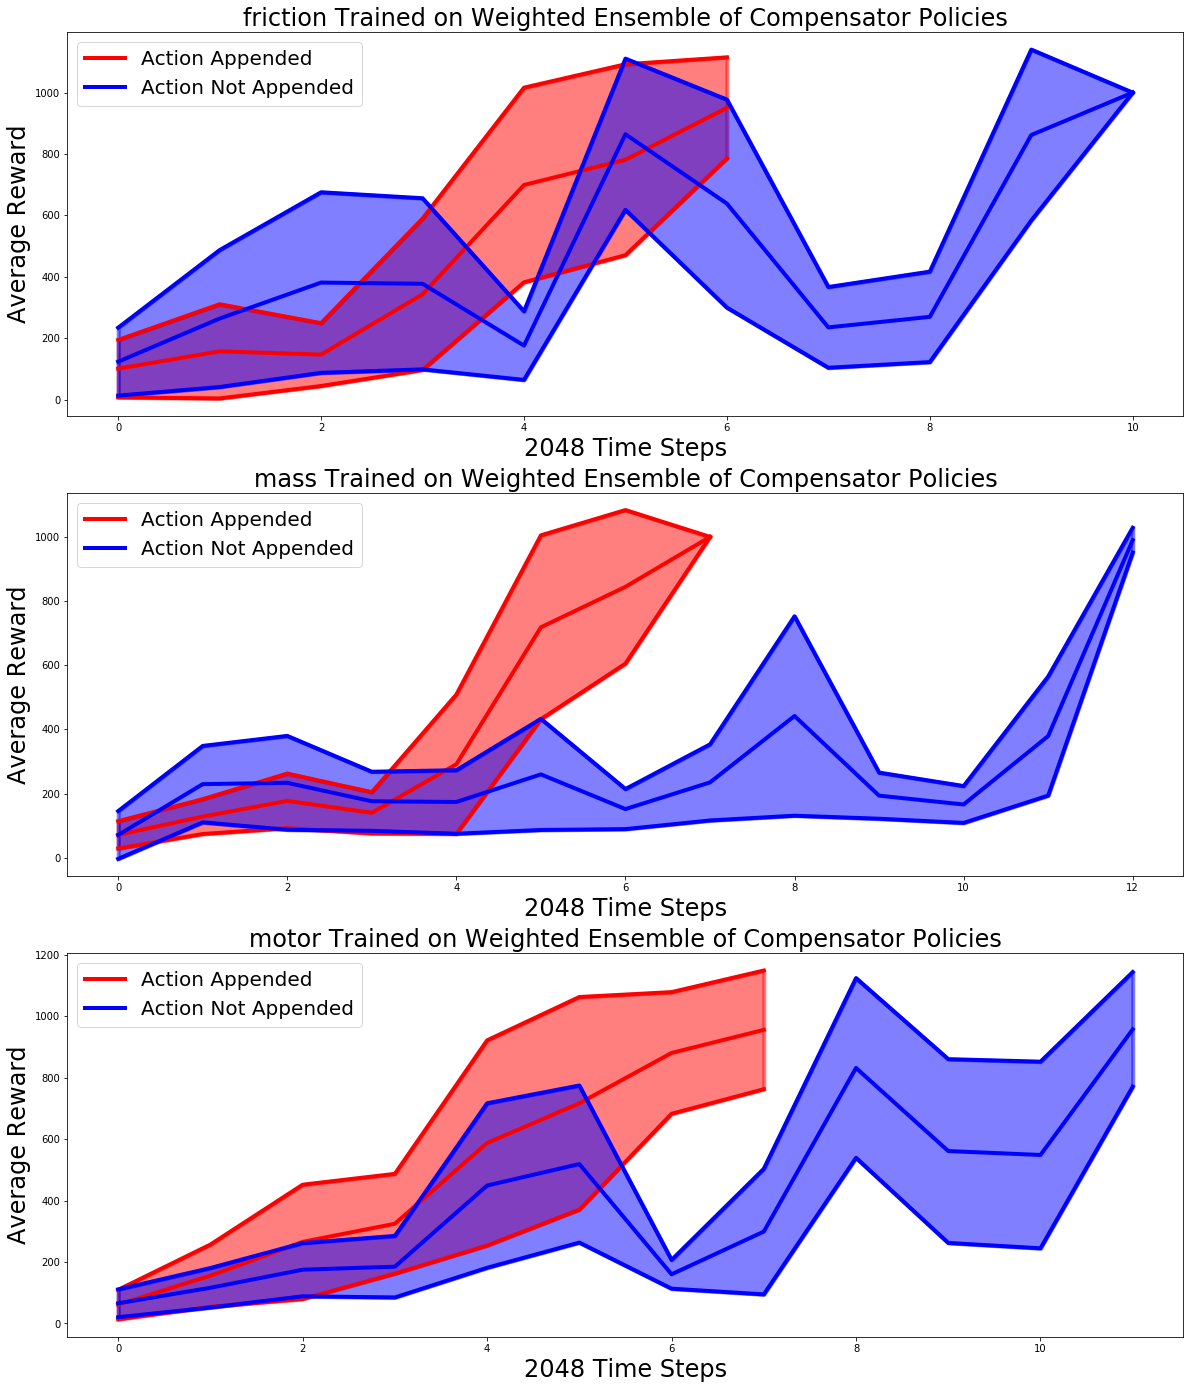

In [53]:
time_step_inc = 2048

fig = plt.figure(figsize=(20, 8*len(action_on.keys())))

ind_on = [0, 0, 0]

ind_off = [4, 0, 6]


for i, key in enumerate(action_on.keys()):
    print(i, key)
    data_on = action_on[key]
    data_off = action_off[key]
    
    rwd_on, high_on, low_on = data_on['arr_0'][:, ind_on[i]], data_on['arr_0'][:, ind_on[i]] + data_on['arr_1'][:, ind_on[i]], data_on['arr_0'][:, ind_on[i]] - data_on['arr_1'][:, ind_on[i]]
    rwd_off, high_off, low_off = data_off['arr_0'][:, ind_off[i]], data_off['arr_0'][:, ind_off[i]] + data_off['arr_1'][:, ind_off[i]], data_off['arr_0'][:, ind_off[i]] - data_off['arr_1'][:, ind_off[i]]
    
    subplot_ax = fig.add_subplot(len(action_on.keys()), 1, i+1)

    subplot_ax.set_title('{} Trained on Weighted Ensemble of Compensator Policies'.format(key), fontsize = 24)
    subplot_ax.plot(np.arange(len(rwd_on)), rwd_on, label='Action Appended',
                    color='r',linewidth=4)
    
    subplot_ax.plot(np.arange(len(rwd_on)), high_on,
                    np.arange(len(rwd_on)), low_on,
                    color='r',linewidth=4)
    subplot_ax.fill_between(np.arange(len(rwd_on)), high_on.squeeze(), low_on.squeeze(), color='r',linewidth=4, alpha=0.5)
    
    
    subplot_ax.plot(np.arange(len(rwd_off)), rwd_off, label='Action Not Appended',
                    color='b',linewidth=4)

    subplot_ax.plot(np.arange(len(rwd_off)), high_off,
                    np.arange(len(rwd_off)), low_off,
                    color='b',linewidth=4)

    subplot_ax.fill_between(np.arange(len(rwd_off)), high_off.squeeze(), low_off.squeeze(), color='b',linewidth=4, alpha=0.5)
    subplot_ax.set_xlabel('{} Time Steps'.format(time_step_inc), fontsize=24)
    subplot_ax.set_ylabel('Average Reward', fontsize=24)

    subplot_ax.legend(fontsize=20)